<a href="https://colab.research.google.com/github/erhmantraut123/SCT_ML_01/blob/main/SCT_ML_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
file_path = "data.csv"
df = pd.read_csv("/content/Housing.csv")

In [5]:
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [6]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [7]:
df = df.dropna()

      price  area  bedrooms  bathrooms  stories  parking
0  13300000  7420         4          2        3        2
1  12250000  8960         4          4        4        3
2  12250000  9960         3          2        2        2
3  12215000  7500         4          2        2        3
4  11410000  7420         4          1        2        2


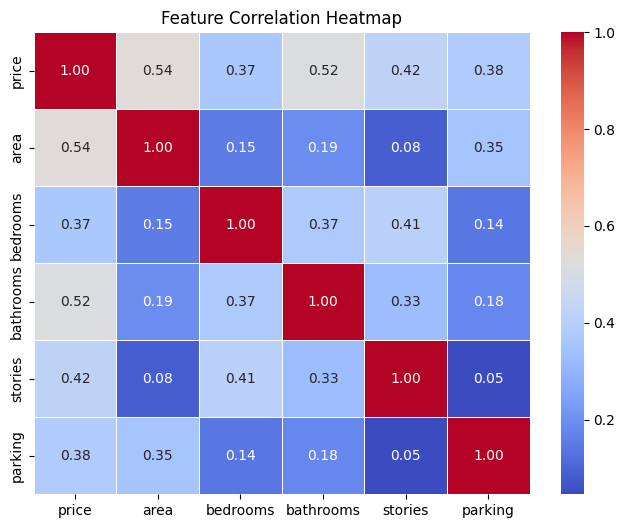

In [8]:
numeric_df = df.select_dtypes(include=['number'])
print(numeric_df.head())

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [14]:
import scipy.stats as stats

# Convert numeric columns to numeric type
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].astype(float)

z_score = stats.zscore(df[numeric_cols]) # Calculate z-score only for numeric columns
threshold = 3
print("BEFORE REMOVING OUTLERS",df.shape)
outliers_df = df[(np.abs(z_score) > threshold).any(axis=1)] # Use np.abs for absolute z-score
df = df[(np.abs(z_score) <= threshold).all(axis=1)] # Use np.abs for absolute z-score
print("AFTER REMOVING OUTLERS",df.shape)

BEFORE REMOVING OUTLERS (545, 13)
AFTER REMOVING OUTLERS (522, 13)


In [16]:
from sklearn.preprocessing import StandardScaler

# Select only numeric features for scaling
numeric_features = df.select_dtypes(include=['number']).columns
numeric_df = df[numeric_features]

# Initialize and apply StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Create a new DataFrame with scaled numeric features
scaled_df = pd.DataFrame(scaled_data, columns=numeric_features, index=df.index)

# Concatenate scaled numeric features with original non-numeric features
final_df = pd.concat([df.drop(columns=numeric_features), scaled_df], axis=1)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [18]:
x = df.drop('price',axis=1)
y= df['price']
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [19]:
print(f"'xtrain {x_train.shape}")
print(f"'xtest {x_test.shape}")

'xtrain (391, 12)
'xtest (131, 12)


In [20]:
models ={
    'KNN': KNeighborsRegressor(),
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

In [22]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd


# Assuming 'df' is your DataFrame

# 1. Separate features and target
x = df.drop('price', axis=1)
y = df['price']

# 2. Identify categorical and numerical features
categorical_features = x.select_dtypes(include=['object']).columns
numerical_features = x.select_dtypes(include=['number']).columns

# 3. Create LabelEncoders for categorical features
label_encoders = {}
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    x[feature] = label_encoders[feature].fit_transform(x[feature])

# 4. Create StandardScaler for numerical features
scaler = StandardScaler()
x[numerical_features] = scaler.fit_transform(x[numerical_features])

# 5. Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


# 6. Model Training and Evaluation (Rest of your code remains the same)
models = {
    'KNN': KNeighborsRegressor(),
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

for name, model in models.items():
    print()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("MEAN SQUARED ERROR", mean_squared_error(y_test, y_pred))
    print("MEAN ABSOLUTE ERROR", mean_absolute_error(y_test, y_pred))
    print("R2 SCORE", r2_score(y_test, y_pred))


MEAN SQUARED ERROR 1397186824770.9924
MEAN ABSOLUTE ERROR 892516.0305343511
R2 SCORE 0.5593481093467083

MEAN SQUARED ERROR 1062980794880.8113
MEAN ABSOLUTE ERROR 785442.5482248459
R2 SCORE 0.664751707725885

MEAN SQUARED ERROR 2165518564722.1375
MEAN ABSOLUTE ERROR 1087245.3435114503
R2 SCORE 0.3170277353953589

MEAN SQUARED ERROR 1201170625713.8777
MEAN ABSOLUTE ERROR 845472.1404580153
R2 SCORE 0.62116869567191


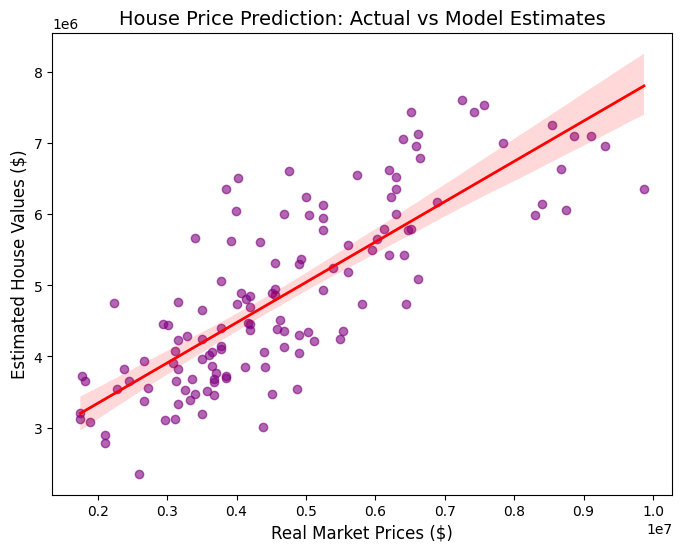

In [23]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha': 0.6, 'color': 'purple', 'marker': 'D'},
            line_kws={"color": "red", "linewidth": 2})
plt.xlabel("Real Market Prices ($)", fontsize=12)
plt.ylabel("Estimated House Values ($)", fontsize=12)
plt.title("House Price Prediction: Actual vs Model Estimates", fontsize=14)
plt.show()